In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
file_path = 'Mall_Customers.csv'
customer_data = pd.read_csv(file_path)

In [4]:
print("Sample Input:")
print(customer_data.head())

Sample Input:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
purchase_history = customer_data[features]

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(purchase_history)

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


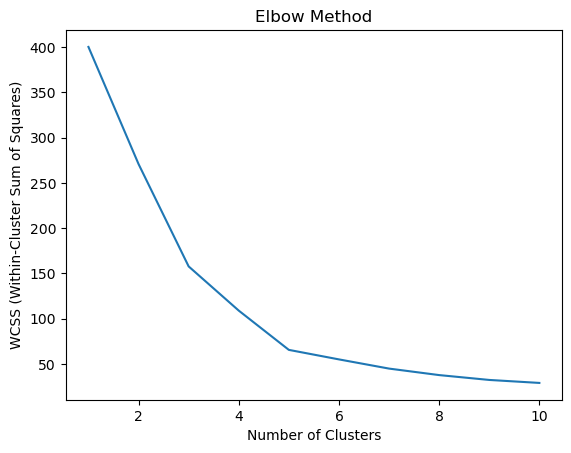

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [10]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

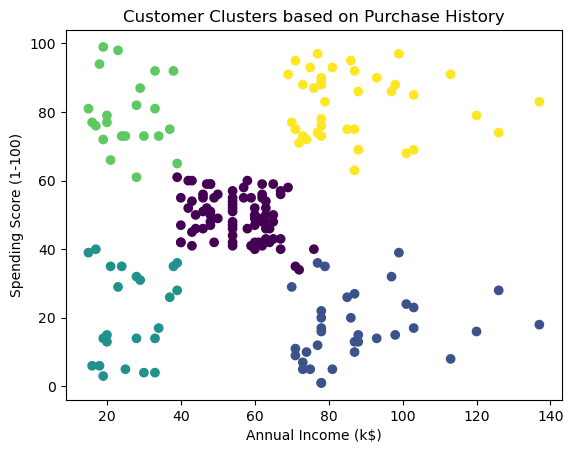

In [11]:
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'],
            c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters based on Purchase History')
plt.show()

In [13]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=features)
cluster_summary['CustomerCount'] = customer_data['Cluster'].value_counts().sort_index()
print('\nCluster Centers and Customer Counts:')
print(cluster_summary)


Cluster Centers and Customer Counts:
   Annual Income (k$)  Spending Score (1-100)  CustomerCount
0           55.296296               49.518519             81
1           88.200000               17.114286             35
2           26.304348               20.913043             23
3           25.727273               79.363636             22
4           86.538462               82.128205             39
